# AirBnB Data - Exploration and Wrangling 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = pd.read_csv('Victoria_InsideAirBnB_Data.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1591,https://www.airbnb.com/rooms/1591,20210226071848,2021-02-26,Garden Suite-King-Ensuite,Relax and unwind at Abbeymoore Manor perfectly...,Welcome to Abbeymoore Manor<br /><br />Abbeymo...,https://a0.muscache.com/pictures/74e63878-b71c...,1748,https://www.airbnb.com/users/show/1748,Jeff,2008-08-11,"Victoria, British Columbia, Canada",I am innkeeper Jeff....\r\nI own and operate A...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/aeb69...,https://a0.muscache.com/im/pictures/user/aeb69...,NaN,6,6,"['email', 'phone', 'work_email']",t,f,"Victoria, British Columbia, Canada",Rockland,Victoria,48.42128,-123.33932,Private room in bed and breakfast,Private room,4,NaN,1 private bath,1.0,2.0,"[""Essentials"", ""Oven"", ""Refrigerator"", ""Hot wa...",$149.00,1,356,1,7,356,356,3.8,356.0,NaN,t,0,3,30,302,2021-02-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,8,1,7,0,NaN
1,19898,https://www.airbnb.com/rooms/19898,20210226071848,2021-02-27,Duchess Suite,<b>The space</b><br />The original Master Bedr...,NaN,https://a0.muscache.com/pictures/101822/ae950f...,69729,https://www.airbnb.com/users/show/69729,Ryan,2010-01-11,CA,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/69729/profile...,https://a0.muscache.com/im/users/69729/profile...,NaN,4,4,"['email', 'phone']",t,f,NaN,Rockland,Victoria,48.42515,-123.33977,Private room in apartment,Private room,1,NaN,1 bath,1.0,1.0,"[""Refrigerator"", ""Cable TV"", ""Free parking on ...",$279.00,2,30,2,2,30,30,2.0,30.0,NaN,f,0,0,0,0,2021-02-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,41168,https://www.airbnb.com/rooms/41168,20210226071848,2021-02-26,"Burma Suite, Ocean Island Garden Suites","Our Burma Suite is a bright, fun apartment dec...","Our Suites are located in beautiful James Bay,...",https://a0.muscache.com/pictures/miso/Hosting-...,173169,https://www.airbnb.com/users/show/173169,Ocean Island Garden Suites,2010-07-19,"Victoria, British Columbia, Canada",“A seriously good deal for groups of up to fou...,within a few hours,100%,87%,f,https://a0.muscache.com/im/users/173169/profil...,https://a0.muscache.com/im/users/173169/profil...,NaN,5,5,"['email', 'phone', 'reviews']",t,t,"Victoria, British Columbia, Canada",James Bay,Victoria,48.41333,-123.37065,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,0.0,"[""Essentials"", ""Long term stays allowed"", ""Hea...",$107.00,28,90,28,28,90,90,28.0,90.0,NaN,t,0,0,0,0,2021-02-26,20,1,0,2013-07-04,2020-08-30,82.0,8.0,9.0,9.0,10.0,9.0,8.0,NaN,f,3,3,0,0,0.21
3,47421,https://www.airbnb.com/rooms/47421,20210226071848,2021-02-26,Downtown by the Park,<b>The space</b><br />This one bedroom apartme...,NaN,https://a0.muscache.com

In [17]:
def a2n(string):
    if string == 'P':
        string = '1'
    elif string == 'H':
        string = '1'
    elif string == 'S':
        string = '1'
    else:
        string = string
    return int(string)

def currency_conv(text):
    text = "".join([char for char in text if char not in ('$',',')])
    return float(text)

In [18]:
df['price'] = df['price'].apply(lambda x: currency_conv(x))

In [19]:
df['bathrooms_text'] = df['bathrooms_text'].str[0].apply(lambda x: a2n(x))

# Let's explore and get to know our data


In [20]:
# Check to see what the prices are like

df['price'].sort_values()

371        15.0
1237       24.0
2866       25.0
189        25.0
181        26.0
         ...   
2777     4000.0
383      4432.0
180      9999.0
2318    24999.0
2314    24999.0
Name: price, Length: 2883, dtype: float64

In [21]:
# Let's see how many listings have been reviewed, brand new listings will have no reviews
df['first_review'].isna().value_counts()

False    2527
True      356
Name: first_review, dtype: int64

In [22]:
# Check to see how current the prices are - old prices would have to be further processed so let's see if we can avoid that

def year(string):
    string = string[0:4]
    return string

years = df['last_scraped'].apply(lambda x: year(x)).value_counts()
print(f'Out of all {len(df)} rows in our AirBnB-Victoria dataset, {years[0]} rows are current as of {years.index[0]}')

Out of all 2883 rows in our AirBnB-Victoria dataset, 2883 rows are current as of 2021


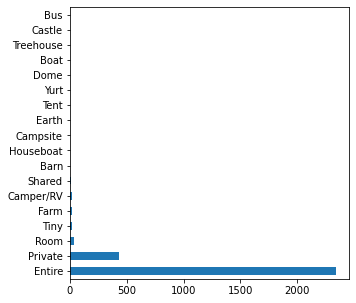

In [23]:
# Let's see what kinds are properties are being listed in Victoria

# Let's "bin" the data according to the first word, for simplicity 
df['property_type'].str.split(' ').str[0].value_counts().plot(kind='barh',figsize=(5,5));

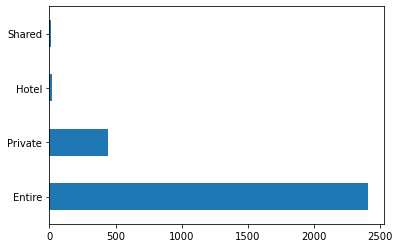

In [24]:
# Alternatively, we can explore "room_type" and see that it gets very similar results 
df['room_type'].str.split(' ').str[0].value_counts().plot.barh();

In [25]:
# Let's explore where exactly around Victoria these properties are located

df['neighbourhood_group_cleansed'].value_counts()

Victoria                 991
Saanich                  479
Salt Spring Island       252
Juan de Fuca             235
Langford                 177
Southern Gulf Islands    133
Sooke                    116
North Saanich             81
Colwood                   80
Central Saanich           70
Esquimalt                 66
Sidney                    62
Oak Bay                   56
View Royal                44
Metchosin                 21
Highlands                 20
Name: neighbourhood_group_cleansed, dtype: int64

In [26]:
# print(df['accommodates'].value_counts())
# print(df['bedrooms'].value_counts())
# print(df['beds'].value_counts())

# unit_price = pd.DataFrame(df.price)
# unit_price['price'] = unit_price['price'].apply(lambda x: currency_conv(x))
# unit_price['guests'] = df.accommodates
# unit_price['bedrooms'] = df.bedrooms
# unit_price['beds'] = df.beds
# unit_price['baths'] = df.bathrooms_text.str[0].apply(lambda x: a2n(x))

# y = unit_price['price']
# x1 = unit_price['guests']
# x2 = df['bedrooms']
# x3 = df['beds']
# x4 = df['bathrooms_text'].str[0].apply(lambda x: a2n(x))

# plt.plot(x1,y,'red')
# plt.plot(x2,y,'blue')
# plt.plot(x3,y,'green')
# plt.plot(x4,y,'yellow')
# plt.show()

In [27]:
# num_feats = df[['price','property_type','bedrooms','beds','bathrooms_text','accommodates','latitude','longitude','first_review']].copy(deep=True)

# # Typical non-sophisticated real estate investors buy entire properties so we will only consider listings of entire properties to be realistic
# num_feats['property_type'] = df['property_type'].str.split(' ').str[0]
# num_feats = num_feats[num_feats['property_type']=='Entire']

# # Convert price to float value
# num_feats['price'] = num_feats['price'].apply(lambda x: currency_conv(x))

# # Drop listings that do not have any reviews, we can consider this to be unreliable data



# num_feats['bathrooms_text'] = num_feats['bathrooms_text'].str[0].apply(lambda x: a2n(x))
# num_feats.sort_values(by=['price'])

In [28]:
df2 = df[['price','accommodates','beds','bedrooms','bathrooms_text','latitude','longitude']]

In [29]:
df2

,price,accommodates,beds,bedrooms,bathrooms_text,latitude,longitude
0,149.0,4,2.0,1.0,1,48.42128,-123.33932
1,279.0,1,1.0,1.0,1,48.42515,-123.33977
2,107.0,3,0.0,1.0,1,48.41333,-123.37065
3,100.0,2,1.0,1.0,1,48.42106,-123.36340
4,89.0,3,2.0,2.0,1,48.42151,-123.36383
...,...,...,...,...,...,...,...
2878,175.0,2,1.0,NaN,1,48.76854,-123.30361
2879,210.0,4,1.0,NaN,1,48.80286,-123.32028
2880,225.0,8,4.0,1.0,1,48.80397,-123.32176
2881,68.0,4,1.0,NaN,1,48.45151,-123.49255


In [30]:
df2 = df2.dropna()

In [31]:
df2

,price,accommodates,beds,bedrooms,bathrooms_text,latitude,longitude
0,149.0,4,2.0,1.0,1,48.42128,-123.33932
1,279.0,1,1.0,1.0,1,48.42515,-123.33977
2,107.0,3,0.0,1.0,1,48.41333,-123.37065
3,100.0,2,1.0,1.0,1,48.42106,-123.36340
4,89.0,3,2.0,2.0,1,48.42151,-123.36383
...,...,...,...,...,...,...,...
2873,215.0,4,2.0,2.0,2,48.37687,-123.71806
2876,90.0,2,1.0,1.0,1,48.44279,-123.38698
2877,100.0,4,2.0,1.0,1,48.42604,-123.36237
2880,225.0,8,4.0,1.0,1,48.80397,-123.32176


In [32]:
df2 = df2[df2['price']>60]
df2 = df2[df2['price']<4000]
df2 

,price,accommodates,beds,bedrooms,bathrooms_text,latitude,longitude
0,149.0,4,2.0,1.0,1,48.42128,-123.33932
1,279.0,1,1.0,1.0,1,48.42515,-123.33977
2,107.0,3,0.0,1.0,1,48.41333,-123.37065
3,100.0,2,1.0,1.0,1,48.42106,-123.36340
4,89.0,3,2.0,2.0,1,48.42151,-123.36383
...,...,...,...,...,...,...,...
2873,215.0,4,2.0,2.0,2,48.37687,-123.71806
2876,90.0,2,1.0,1.0,1,48.44279,-123.38698
2877,100.0,4,2.0,1.0,1,48.42604,-123.36237
2880,225.0,8,4.0,1.0,1,48.80397,-123.32176


In [48]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as model_selection

from sklearn.model_selection import train_test_split

# Split dataset into training set and test set, 70/30
X_train, X_test, y_train, y_test = train_test_split(df2[['bedrooms','bathrooms_text','latitude','longitude','accommodates']], df2['price'], test_size=0.20,random_state=109) 

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



# Plot outputs
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()


Coefficients: 
 [ 25.87961997 100.90534354  91.74706352 -36.87820748   7.42380453]
Mean squared error: 7907.37
Coefficient of determination: 0.59


In [35]:
y = pd.DataFrame(y_test) 
y['pricepred'] = y_pred
y.head(60)

,price,pricepred
960,239.0,159.546489
1966,220.0,154.410020
1950,126.0,96.949333
666,300.0,187.861107
2374,89.0,111.598149
2457,550.0,264.385115
812,90.0,141.460348
2004,99.0,105.033038
421,185.0,141.611906
2424,110.0,94.490716


In [46]:
# Import SVM
import sklearn
from sklearn.pipeline import make_pipeline
svm = sklearn.svm.SVR()

# Train the model using the training sets
regr2 = make_pipeline(sklearn.preprocessing.StandardScaler(),sklearn.svm.SVR())
regr2.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr2.predict(X_test)

# The coefficients
# print('Coefficients: \n', svm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 14253.07
Coefficient of determination: 0.21


In [47]:
from tensorflow import keras
